In [3]:
import csv
from re import L
import networkx as nx
import matplotlib.pyplot as plt
from node2vec import Node2Vec

/Users/yashchhabria/Mini Projects/XAI-Lateral-Movement/graphgen/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
G = nx.Graph()
with open('auth_1_12.csv', mode ='r')as file:
  for line in file:
    split_line = line.split(',')
    # source_node = (split_line[1], split_line[3])
    source_node = split_line[1]
    # destination_node = (split_line[2], split_line[4])
    destination_node = split_line[2]
    G.add_nodes_from([source_node, destination_node])
    G.add_edge(source_node, destination_node)

In [5]:
node2vec = Node2Vec(G, dimensions=20, walk_length=16, num_walks=100)
model = node2vec.fit(window=10, min_count=1)



Generating walks (CPU: 1): 100%|██████████| 100/100 [00:10<00:00,  9.64it/s]


In [6]:
model.wv.most_similar('C1035$@DOM1')

[('C303$@DOM1', 0.7573552131652832),
 ('SYSTEM@C1361', 0.7528783082962036),
 ('C1361$@DOM1', 0.752528190612793),
 ('SYSTEM@C303', 0.7516448497772217),
 ('C1112$@DOM1', 0.7484104633331299),
 ('SYSTEM@C1112', 0.7473284602165222),
 ('SYSTEM@C2623', 0.7468982934951782),
 ('C4984$@DOM1', 0.7440750002861023),
 ('C2623$@DOM1', 0.7411657571792603),
 ('SYSTEM@C4984', 0.7387688159942627)]

In [11]:
import numpy as np 

# player_nodes = [x for x in ]
# print(player_nodes)

embeddings = np.array([model.wv[x] for x in model.wv.index_to_key])


In [16]:
!pip install scikit-learn
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=7, perplexity=15)
embeddings_2d = tsne.fit_transform(embeddings)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 30.8 MB/s eta 0:00:0000:0100:01
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


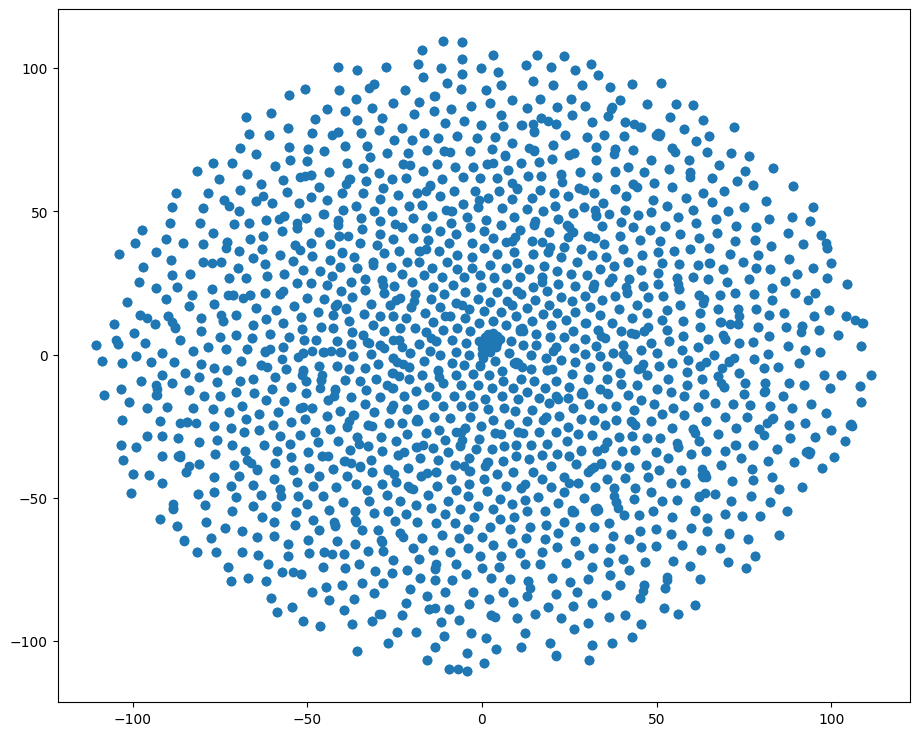

In [17]:
figure = plt.figure(figsize=(11, 9))

ax = figure.add_subplot(111)

ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
